<a href="https://colab.research.google.com/github/Prdazk/collabku/blob/main/DataSciencetugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import zipfile
import os

# Path ke file ZIP di Colab
zip_path = "/content/sample_data/daily+and+sports+activities.zip"
extract_path = "/content/dataset"

# Buat folder tujuan ekstrak
os.makedirs(extract_path, exist_ok=True)

# Ekstrak ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Lihat file-file yang sudah diekstrak
os.listdir(extract_path)


['data']

In [9]:
import pandas as pd

data_folder = os.path.join(extract_path, 'data')
output_folder = "/content/csv_data"
os.makedirs(output_folder, exist_ok=True)

# Fungsi untuk loop semua file dalam folder dan subfolder
for root, dirs, files in os.walk(data_folder):
    for file_name in files:
        file_path = os.path.join(root, file_name)

        # Coba baca file sebagai TXT dengan whitespace/tab
        try:
            df = pd.read_csv(file_path, sep='\s+', header=None)  # header=None jika tidak ada header
        except:
            try:
                df = pd.read_csv(file_path)  # fallback
            except:
                print(f"Gagal membaca: {file_path}")
                continue

        # Simpan sebagai CSV
        relative_path = os.path.relpath(file_path, data_folder).replace("/", "_")
        csv_path = os.path.join(output_folder, relative_path.split('.')[0] + ".csv")
        df.to_csv(csv_path, index=False)
        print(f"{file_path} -> {csv_path}")


<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-567050702.py:14: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file_path, sep='\s+', header=None)  # header=None jika tidak ada header


Streaming output truncated to the last 5000 lines.
/content/dataset/data/a08/p7/s11.txt -> /content/csv_data/a08_p7_s11.csv
/content/dataset/data/a08/p7/s38.txt -> /content/csv_data/a08_p7_s38.csv
/content/dataset/data/a08/p7/s60.txt -> /content/csv_data/a08_p7_s60.csv
/content/dataset/data/a08/p7/s22.txt -> /content/csv_data/a08_p7_s22.csv
/content/dataset/data/a08/p7/s19.txt -> /content/csv_data/a08_p7_s19.csv
/content/dataset/data/a08/p7/s02.txt -> /content/csv_data/a08_p7_s02.csv
/content/dataset/data/a08/p7/s20.txt -> /content/csv_data/a08_p7_s20.csv
/content/dataset/data/a08/p7/s13.txt -> /content/csv_data/a08_p7_s13.csv
/content/dataset/data/a08/p7/s39.txt -> /content/csv_data/a08_p7_s39.csv
/content/dataset/data/a08/p7/s14.txt -> /content/csv_data/a08_p7_s14.csv
/content/dataset/data/a08/p7/s36.txt -> /content/csv_data/a08_p7_s36.csv
/content/dataset/data/a08/p7/s06.txt -> /content/csv_data/a08_p7_s06.csv
/content/dataset/data/a08/p7/s08.txt -> /content/csv_data/a08_p7_s08.csv


In [11]:
import pandas as pd
import os

# Folder CSV yang sudah diekstrak
csv_folder = "/content/csv_data"

data_list = []
target_list = []

# Loop semua file CSV
for root, dirs, files in os.walk(csv_folder):
    for file_name in files:
        file_path = os.path.join(root, file_name)

        # Baca CSV dan pisahkan kolom angka
        df = pd.read_csv(file_path, header=None)
        df_expanded = df[0].str.split(",", expand=True).astype(float)

        # Tentukan target dari nama folder (misal a01 -> aktivitas 1)
        activity_label = os.path.basename(root)  # ambil nama folder
        df_expanded['Activity'] = activity_label

        data_list.append(df_expanded)

# Gabungkan semua dataframe menjadi satu
df_all = pd.concat(data_list, ignore_index=True)
df_all.head()



,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,Activity
0,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,csv_data
1,-7.8546,5.7438,4.2137,1.1316,0.30027,-0.69473,0.52777,-0.28400,-0.52675,-0.63265,...,-12.505,-2.3616,-1.9410,-0.143100,-0.45134,1.42910,0.59159,0.33902,0.20906,csv_data
2,-7.7665,5.7263,4.6992,1.0344,1.09950,-0.99101,0.54609,-0.29376,-0.51291,0.52934,...,-11.811,-3.6942,-2.0374,0.002448,-0.36528,1.23730,0.61038,0.31175,0.21016,csv_data
3,-8.2394,5.0627,4.8704,2.4399,1.97200,-1.24370,0.59163,-0.30743,-0.46393,0.93852,...,-11.198,-4.8772,-2.0751,0.297240,-0.17706,0.84144,0.62568,0.28855,0.20580,csv_data
4,-9.1067,4.3150,4.6053,2.9547,1.71430,-1.18460,0.64511,-0.33190,-0.38227,1.45660,...,-10.671,-3.4321,-1.5991,0.325440,-0.14849,0.48852,0.63353,0.27940,0.19950,csv_data


In [12]:
# Tampilkan dimensi dataset
print("Dimensi dataset:", df_all.shape)  # (jumlah baris, jumlah kolom)

# Tampilkan tipe data setiap kolom
print("\nTipe data tiap kolom:")
print(df_all.dtypes)

# Tampilkan 5 baris pertama
print("\n5 baris pertama:")
print(df_all.head())

# Statistik deskriptif untuk fitur numerik
print("\nStatistik deskriptif:")
print(df_all.describe())


Dimensi dataset: (1149120, 46)

Tipe data tiap kolom:
0           float64
1           float64
2           float64
3           float64
4           float64
5           float64
6           float64
7           float64
8           float64
9           float64
10          float64
11          float64
12          float64
13          float64
14          float64
15          float64
16          float64
17          float64
18          float64
19          float64
20          float64
21          float64
22          float64
23          float64
24          float64
25          float64
26          float64
27          float64
28          float64
29          float64
30          float64
31          float64
32          float64
33          float64
34          float64
35          float64
36          float64
37          float64
38          float64
39          float64
40          float64
41          float64
42          float64
43          float64
44          float64
Activity     object
dtype: object

5 baris per

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

    csv_data       1.00      1.00      1.00    229824

    accuracy                           1.00    229824
   macro avg       1.00      1.00      1.00    229824
weighted avg       1.00      1.00      1.00    229824



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


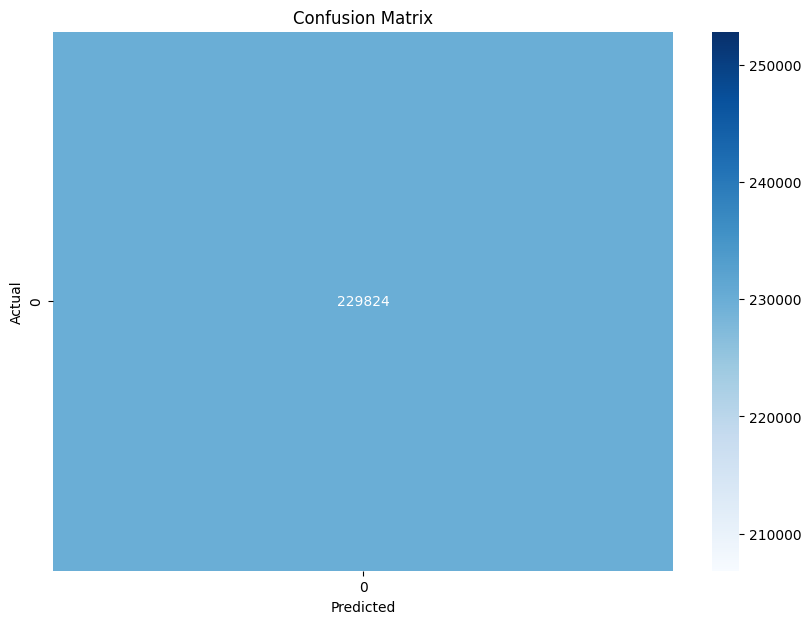

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Misal df_all sudah siap dan Activity adalah target
X = df_all.drop('Activity', axis=1)
y = df_all['Activity']

# Bagi data menjadi training dan testing (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Contoh model: Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Jumlah data (N) = 1149120


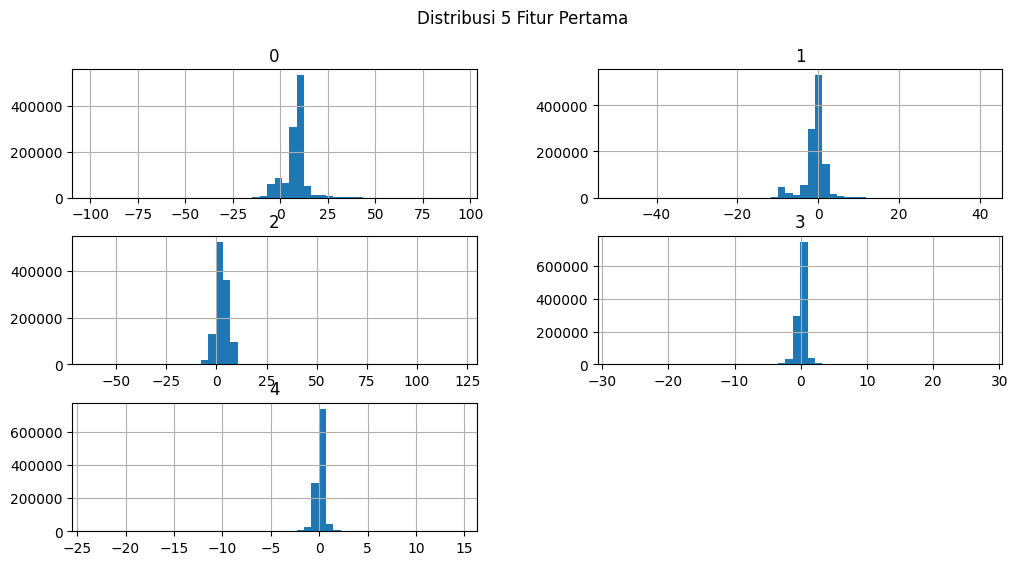

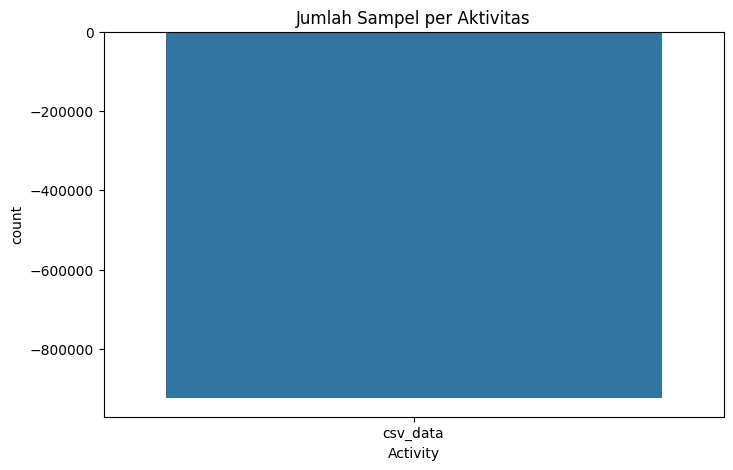

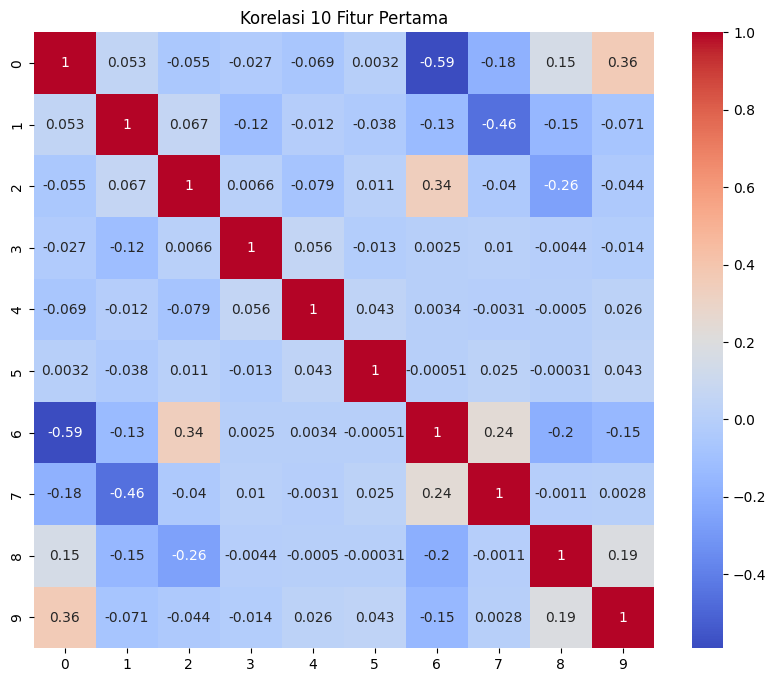

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Jumlah sampel
print("Jumlah data (N) =", df_all.shape[0])

# 2. Histogram beberapa fitur pertama untuk melihat distribusi
df_all.iloc[:, :5].hist(figsize=(12,6), bins=50)
plt.suptitle("Distribusi 5 Fitur Pertama")
plt.show()

# 3. Count plot untuk kolom Activity (target)
plt.figure(figsize=(8,5))
sns.countplot(x='Activity', data=df_all)
plt.title("Jumlah Sampel per Aktivitas")
plt.show()

# 4. Heatmap korelasi beberapa fitur pertama
plt.figure(figsize=(10,8))
sns.heatmap(df_all.iloc[:, :10].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi 10 Fitur Pertama")
plt.show()


In [16]:
import pandas as pd

# Tampilkan nama semua fitur (kolom 0–44)
feature_columns = df_all.columns[:-1]  # kecuali kolom Activity
print("Nama fitur:")
print(feature_columns)

# Statistik deskriptif untuk semua fitur
print("\nStatistik deskriptif fitur:")
print(df_all[feature_columns].describe())


Nama fitur:
Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44],
      dtype='object')

Statistik deskriptif fitur:
                 0             1             2             3             4   \
count  1.149120e+06  1.140000e+06  1.140000e+06  1.140000e+06  1.140000e+06   
mean   7.704133e+00 -8.110365e-01  2.768845e+00 -2.796308e-03  1.369504e-02   
std    5.657590e+00  2.623027e+00  3.538260e+00  7.940107e-01  6.910401e-01   
min   -9.971500e+01 -4.994100e+01 -6.266400e+01 -2.785100e+01 -2.359800e+01   
25%    6.828600e+00 -1.509500e+00  8.998450e-01 -1.628925e-01 -1.024800e-01   
50%    8.808900e+00 -3.895300e-01  2.703700e+00  4.610000e-04  1.743750e-02   
75%    9.684100e+00  4.136200e-01  4.405200e+00  1.648200e-01  1.313100e-01   
max    9.369400e+01  4.101300e+01  1.205300e+02  2.767100e+01  1.437900e+01   

                 5     

In [17]:
# Cek tipe data tiap kolom
print("Tipe data tiap kolom:")
print(df_all.dtypes)

# Cek apakah semua fitur numerik
feature_columns = df_all.columns[:-1]  # kecuali Activity
all_numeric = df_all[feature_columns].apply(lambda x: pd.api.types.is_numeric_dtype(x)).all()
print("\nApakah semua fitur numerik?", all_numeric)


Tipe data tiap kolom:
0           float64
1           float64
2           float64
3           float64
4           float64
5           float64
6           float64
7           float64
8           float64
9           float64
10          float64
11          float64
12          float64
13          float64
14          float64
15          float64
16          float64
17          float64
18          float64
19          float64
20          float64
21          float64
22          float64
23          float64
24          float64
25          float64
26          float64
27          float64
28          float64
29          float64
30          float64
31          float64
32          float64
33          float64
34          float64
35          float64
36          float64
37          float64
38          float64
39          float64
40          float64
41          float64
42          float64
43          float64
44          float64
Activity     object
dtype: object

Apakah semua fitur numerik? True


In [18]:
# Cek jumlah missing values per kolom
missing_values = df_all.isnull().sum()
print("Jumlah missing values per kolom:")
print(missing_values)

# Total missing values di seluruh dataset
total_missing = df_all.isnull().sum().sum()
print("\nTotal missing values di dataset:", total_missing)


Jumlah missing values per kolom:
0              0
1           9120
2           9120
3           9120
4           9120
5           9120
6           9120
7           9120
8           9120
9           9120
10          9120
11          9120
12          9120
13          9120
14          9120
15          9120
16          9120
17          9120
18          9120
19          9120
20          9120
21          9120
22          9120
23          9120
24          9120
25          9120
26          9120
27          9120
28          9120
29          9120
30          9120
31          9120
32          9120
33          9120
34          9120
35          9120
36          9120
37          9120
38          9120
39          9120
40          9120
41          9120
42          9120
43          9120
44          9120
Activity       0
dtype: int64

Total missing values di dataset: 401280


Jumlah sampel per label:
Activity
csv_data    1149120
Name: count, dtype: int64


/tmp/ipython-input-1768490410.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


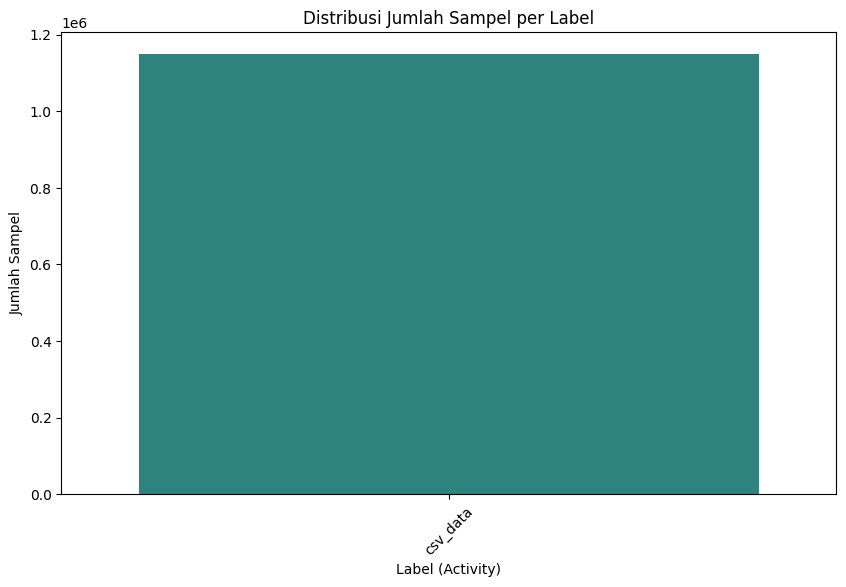

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah sampel per label
label_counts = df_all['Activity'].value_counts()
print("Jumlah sampel per label:")
print(label_counts)

# Visualisasi distribusi label
plt.figure(figsize=(10,6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title("Distribusi Jumlah Sampel per Label")
plt.xlabel("Label (Activity)")
plt.ylabel("Jumlah Sampel")
plt.xticks(rotation=45)
plt.show()


Distribusi label secara detail:
          Jumlah Sampel  Persentase (%)
Activity                               
csv_data        1149120           100.0


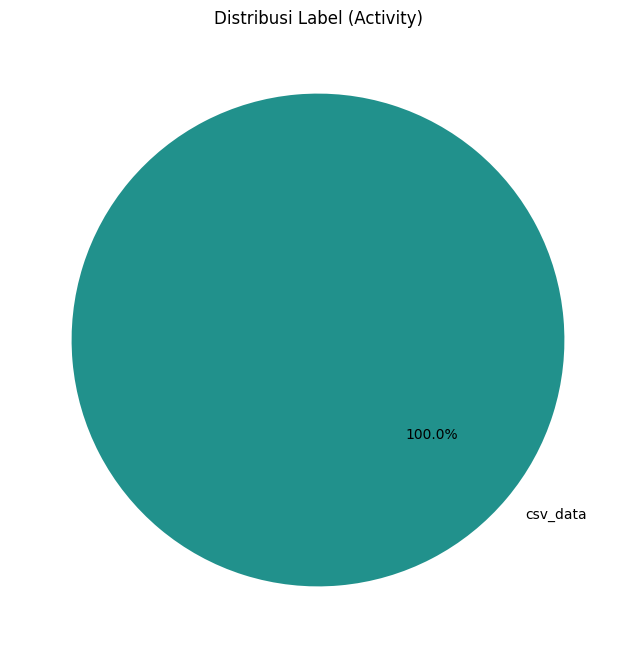

In [22]:
# Hitung jumlah sampel per label
label_counts = df_all['Activity'].value_counts()
total_samples = df_all.shape[0]

# Tampilkan tabel detail
label_distribution = pd.DataFrame({
    'Jumlah Sampel': label_counts,
    'Persentase (%)': (label_counts / total_samples * 100).round(2)
})
print("Distribusi label secara detail:")
print(label_distribution)

# Visualisasi pie chart
plt.figure(figsize=(8,8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(label_counts)))
plt.title("Distribusi Label (Activity)")
plt.show()



Distribusi label secara detail:
          Jumlah Sampel  Persentase (%)
Activity                               
csv_data        1149120           100.0

Jumlah missing value pada label Activity: 0
Jumlah label yang mungkin salah (tidak sesuai format asli): 1


/tmp/ipython-input-2397362893.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


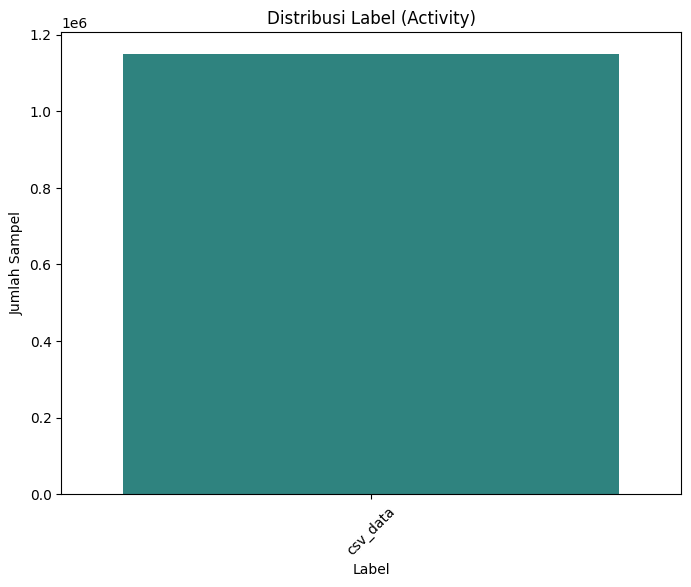

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah sampel per label
label_counts = df_all['Activity'].value_counts()
total_samples = df_all.shape[0]

# Tabel distribusi label
label_distribution = pd.DataFrame({
    'Jumlah Sampel': label_counts,
    'Persentase (%)': (label_counts / total_samples * 100).round(2)
})
print("Distribusi label secara detail:")
print(label_distribution)

# Cek missing value di label
missing_labels = df_all['Activity'].isnull().sum()
print("\nJumlah missing value pada label Activity:", missing_labels)

# Cek potensi kesalahan label (misal label default 'csv_data')
potential_errors = df_all[~df_all['Activity'].str.startswith('a')]['Activity'].nunique()
print("Jumlah label yang mungkin salah (tidak sesuai format asli):", potential_errors)

# Visualisasi distribusi label
plt.figure(figsize=(8,6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title("Distribusi Label (Activity)")
plt.xlabel("Label")
plt.ylabel("Jumlah Sampel")
plt.xticks(rotation=45)
plt.show()


Contoh 5 baris pertama dataset:
        0       1       2       3        4        5        6        7  \
0  0.0000     NaN     NaN     NaN      NaN      NaN      NaN      NaN   
1 -7.8546  5.7438  4.2137  1.1316  0.30027 -0.69473  0.52777 -0.28400   
2 -7.7665  5.7263  4.6992  1.0344  1.09950 -0.99101  0.54609 -0.29376   
3 -8.2394  5.0627  4.8704  2.4399  1.97200 -1.24370  0.59163 -0.30743   
4 -9.1067  4.3150  4.6053  2.9547  1.71430 -1.18460  0.64511 -0.33190   

         8        9  ...      36      37      38        39       40       41  \
0      NaN      NaN  ...     NaN     NaN     NaN       NaN      NaN      NaN   
1 -0.52675 -0.63265  ... -12.505 -2.3616 -1.9410 -0.143100 -0.45134  1.42910   
2 -0.51291  0.52934  ... -11.811 -3.6942 -2.0374  0.002448 -0.36528  1.23730   
3 -0.46393  0.93852  ... -11.198 -4.8772 -2.0751  0.297240 -0.17706  0.84144   
4 -0.38227  1.45660  ... -10.671 -3.4321 -1.5991  0.325440 -0.14849  0.48852   

        42       43       44  Activity  
0      

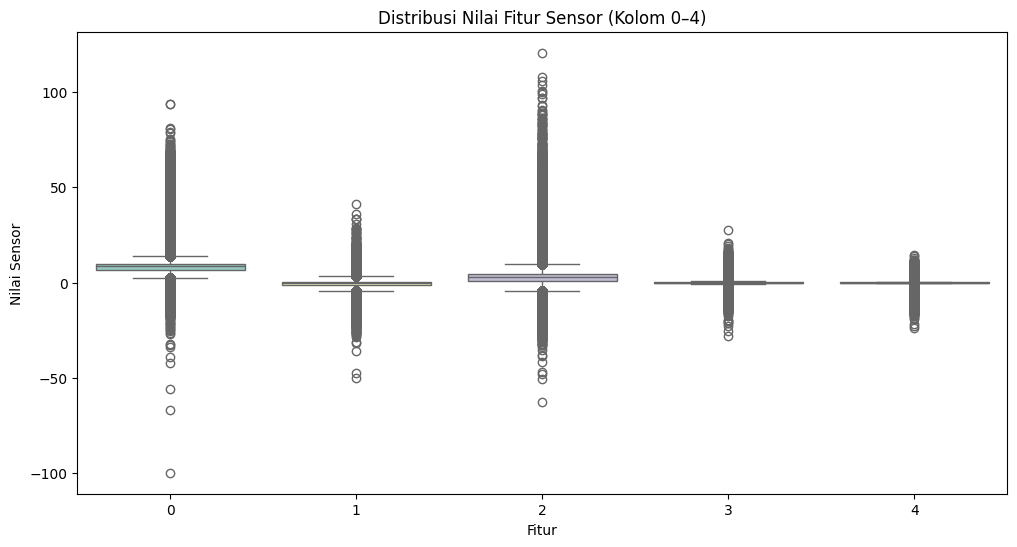

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tampilkan 5 baris pertama
print("Contoh 5 baris pertama dataset:")
print(df_all.head())

# Statistik deskriptif singkat
print("\nStatistik deskriptif:")
print(df_all.describe())

# Visualisasi distribusi beberapa fitur sensor (contoh kolom 0–4)
plt.figure(figsize=(12,6))
sns.boxplot(data=df_all.iloc[:, 0:5], palette="Set3")
plt.title("Distribusi Nilai Fitur Sensor (Kolom 0–4)")
plt.xlabel("Fitur")
plt.ylabel("Nilai Sensor")
plt.show()


In [25]:
from sklearn.model_selection import train_test_split

# Fitur (X) = semua kolom kecuali 'Activity'
X = df_all.iloc[:, :-1]

# Label (y) = kolom 'Activity'
y = df_all['Activity']

# Bagi data menjadi train (80%) dan test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Tampilkan ukuran masing-masing set
print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")
print(f"Ukuran y_train: {y_train.shape}")
print(f"Ukuran y_test: {y_test.shape}")


Ukuran X_train: (919296, 45)
Ukuran X_test: (229824, 45)
Ukuran y_train: (919296,)
Ukuran y_test: (229824,)
